# SIEM Security Solution - Complete Integration Notebook

## One-Class SVM Anomaly Detection (Recommended by Eng Mariam)

This notebook demonstrates the complete SIEM integration pipeline:
1. **Data Loading & Exploration** - Load and analyze malware detection datasets
2. **Data Preprocessing** - Prepare data for machine learning
3. **One-Class SVM Training** - Train anomaly detection model on normal behavior
4. **Attack Simulation** - Generate realistic attack scenarios
5. **Anomaly Detection** - Detect anomalies in real-time
6. **SIEM Integration** - Send alerts to SIEM dashboard

---

**Note**: This solution uses One-Class SVM as recommended by Eng Mariam for detecting anomalies in large-scale security logs without requiring labeled attack data.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
import os
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📅 Execution Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Libraries imported successfully!
📅 Execution Date: 2025-11-09 20:58:57


### Enhanced Visualizations Added

This notebook now includes comprehensive visualizations for SIEM analysis:

1. **Correlation Heatmap** - Feature relationships and dependencies
2. **Box Plots** - Feature distribution analysis with statistics
3. **Violin Plots** - Detailed distribution shapes and quartiles
4. **Normal vs Anomaly Comparisons** - Side-by-side feature analysis
5. **Pair Plots** - Multi-dimensional feature relationships
6. **Statistics Summary** - Comprehensive statistical comparisons
7. **Advanced Alert Visualizations** - SIEM dashboard-ready charts


## Step 1: Load and Explore Data

Load the malware detection datasets (Output1.csv, Output2.csv, Output3.csv) and perform exploratory data analysis.


In [2]:
# Load datasets
print("=" * 80)
print("Loading Datasets")
print("=" * 80)

# Load all three CSV files
df1 = pd.read_csv('Output1.csv')
df2 = pd.read_csv('output2.csv')
df3 = pd.read_csv('output3.csv')

print(f"\nDataset 1 (Output1.csv): {df1.shape[0]} rows, {df1.shape[1]} columns")
print(f"Dataset 2 (output2.csv): {df2.shape[0]} rows, {df2.shape[1]} columns")
print(f"Dataset 3 (output3.csv): {df3.shape[0]} rows, {df3.shape[1]} columns")

# Combine datasets
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
print(f"\nCombined Dataset: {df_combined.shape[0]} rows, {df_combined.shape[1]} columns")

# Display first few rows
print("\n" + "=" * 80)
print("First 5 Rows")
print("=" * 80)
df_combined.head()


Loading Datasets

Dataset 1 (Output1.csv): 150 rows, 56 columns
Dataset 2 (output2.csv): 350 rows, 56 columns
Dataset 3 (output3.csv): 350 rows, 56 columns

Combined Dataset: 850 rows, 56 columns

First 5 Rows


,Filename,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,ldrmodules.not_in_load_avg,ldrmodules.not_in_init_avg,ldrmodules.not_in_mem_avg,malfind.ninjections,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist,psxview.not_in_eprocess_pool,psxview.not_in_ethread_pool,psxview.not_in_pspcid_list,psxview.not_in_csrss_handles,psxview.not_in_session,psxview.not_in_deskthrd,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_csrss_handles_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,Spyware-TIBS-3b63fad1545031b6e3e133a2f900fb188...,22,8,13.772727,0,235.272727,939,42.681818,5176,235.272727,0,474,1693,23,356,489,61,376,85,73,170,26,47,26,0.026971,0.048755,0.026971,1,1,6,1.0,0,0,0,0,4,2,5,0.0,0.0,0.0,0.0,0.181818,0.090909,0.227273,137,385,220,26,23,114,0,114,88,0,8
1,Spyware-TIBS-0cfbc1046bbbe2d1603df1fedde6652a4...,22,8,16.272727,0,239.772727,936,42.545455,5275,239.772727,0,470,1682,23,353,608,61,376,85,71,170,25,46,25,0.026042,0.047917,0.026042,1,1,6,1.0,0,0,0,0,4,2,5,0.0,0.0,0.0,0.0,0.181818,0.090909,0.227273,137,385,220,26,23,114,0,114,88,0,8
2,Spyware-TIBS-3b63fad1545031b6e3e133a2f900fb188...,27,9,13.407407,0,265.296296,1212,44.888889,7163,265.296296,0,541,2590,30,556,633,71,518,107,134,216,30,56,30,0.024174,0.045125,0.024174,2,2,12,1.0,0,0,0,0,4,2,5,0.0,0.0,0.0,0.0,0.148148,0.074074,0.185185,138,389,221,26,24,116,0,120,88,0,8
3,Spyware-TIBS-03d5ee287fdddbfbc90cd0547b7dd0dff...,22,8,13.909091,0,232.136364,936,42.545455,5107,232.136364,0,470,1618,23,353,499,61,376,85,71,170,25,46,25,0.026042,0.047917,0.026042,1,1,6,1.0,0,0,0,0,4,2,5,0.0,0.0,0.0,0.0,0.181818,0.090909,0.227273,137,385,220,26,23,114,0,114,88,0,8
4,Spyware-TIBS-3fa74a3335d8bb79d987b491455387ad3...,22,8,13.454545,0,229.272727,936,42.545455,5044,229.272727,0,470,1599,23,353,465,61,376,85,71,170,25,46,25,0.026042,0.047917,0.026042,1,1,6,1.0,0,0,0,0,4,2,5,0.0,0.0,0.0,0.0,0.181818,0.090909,0.227273,137,385,220,26,23,114,0,114,88,0,8


Feature Correlation Analysis


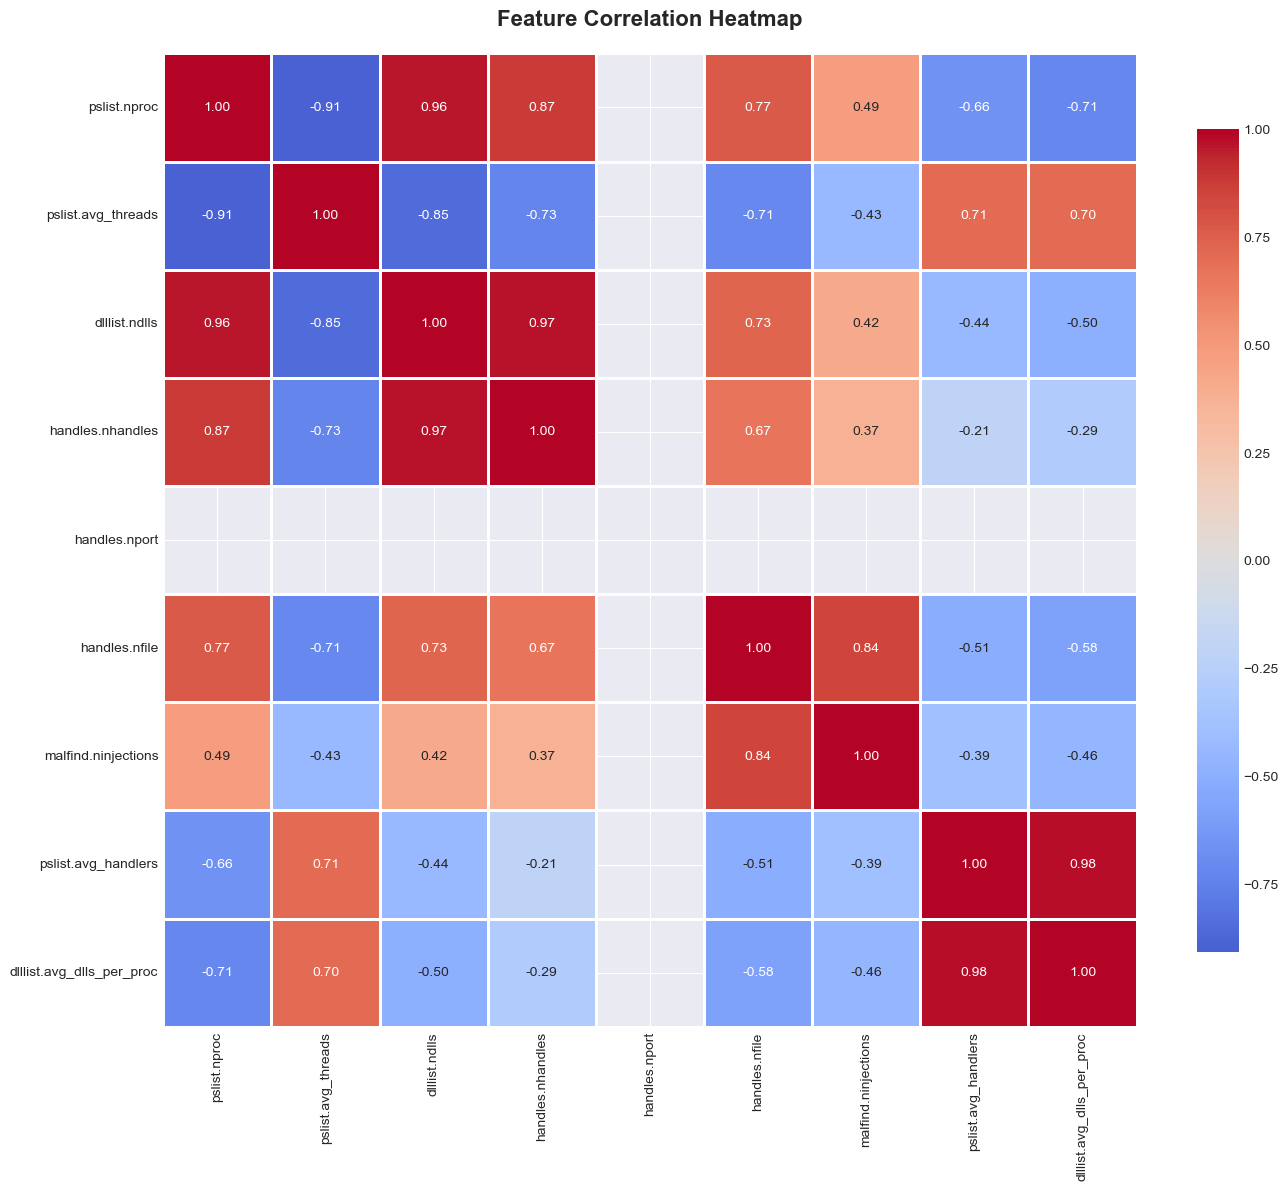

✅ Correlation analysis completed for 9 key features!


In [3]:
# Advanced Data Visualizations - Correlation Analysis
print("=" * 80)
print("Feature Correlation Analysis")
print("=" * 80)

# Select key features for correlation analysis
key_features = ['pslist.nproc', 'pslist.avg_threads', 'dlllist.ndlls', 
                 'handles.nhandles', 'handles.nport', 'handles.nfile',
                 'malfind.ninjections', 'pslist.avg_handlers', 'dlllist.avg_dlls_per_proc']

# Filter to only include features that exist in the dataframe
key_features = [f for f in key_features if f in df_combined.columns]

# Calculate correlation matrix
corr_matrix = df_combined[key_features].corr()

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"✅ Correlation analysis completed for {len(key_features)} key features!")


Feature Distribution Comparison (Box Plots)


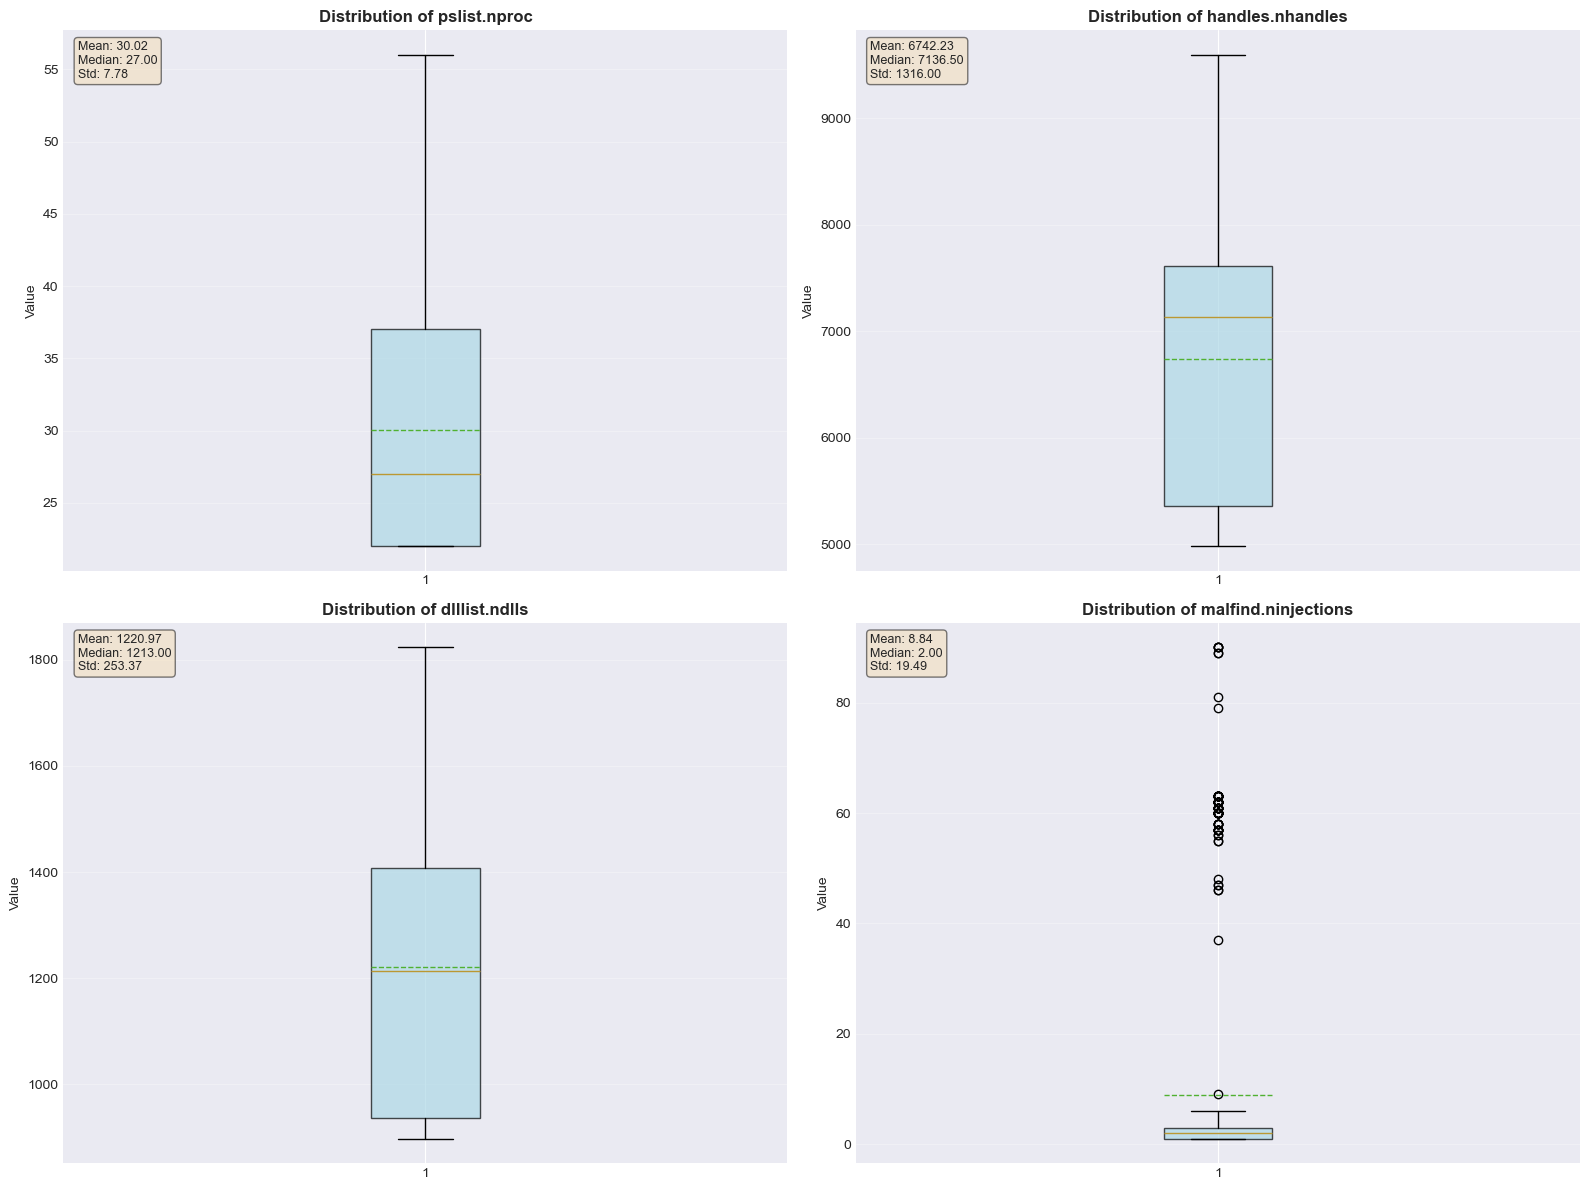

✅ Box plot analysis completed!


In [4]:
# Box Plots - Comparing Feature Distributions
print("=" * 80)
print("Feature Distribution Comparison (Box Plots)")
print("=" * 80)

# Select features for box plot comparison
box_features = ['pslist.nproc', 'handles.nhandles', 'dlllist.ndlls', 'malfind.ninjections']
box_features = [f for f in box_features if f in df_combined.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(box_features):
    bp = axes[idx].boxplot(df_combined[feature].dropna(), patch_artist=True, 
                           showmeans=True, meanline=True)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Color the boxes
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)
    
    # Add statistics text
    stats = df_combined[feature].describe()
    textstr = f'Mean: {stats["mean"]:.2f}\nMedian: {stats["50%"]:.2f}\nStd: {stats["std"]:.2f}'
    axes[idx].text(0.02, 0.98, textstr, transform=axes[idx].transAxes, 
                   fontsize=9, verticalalignment='top', 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✅ Box plot analysis completed!")


Violin Plots - Detailed Feature Distributions


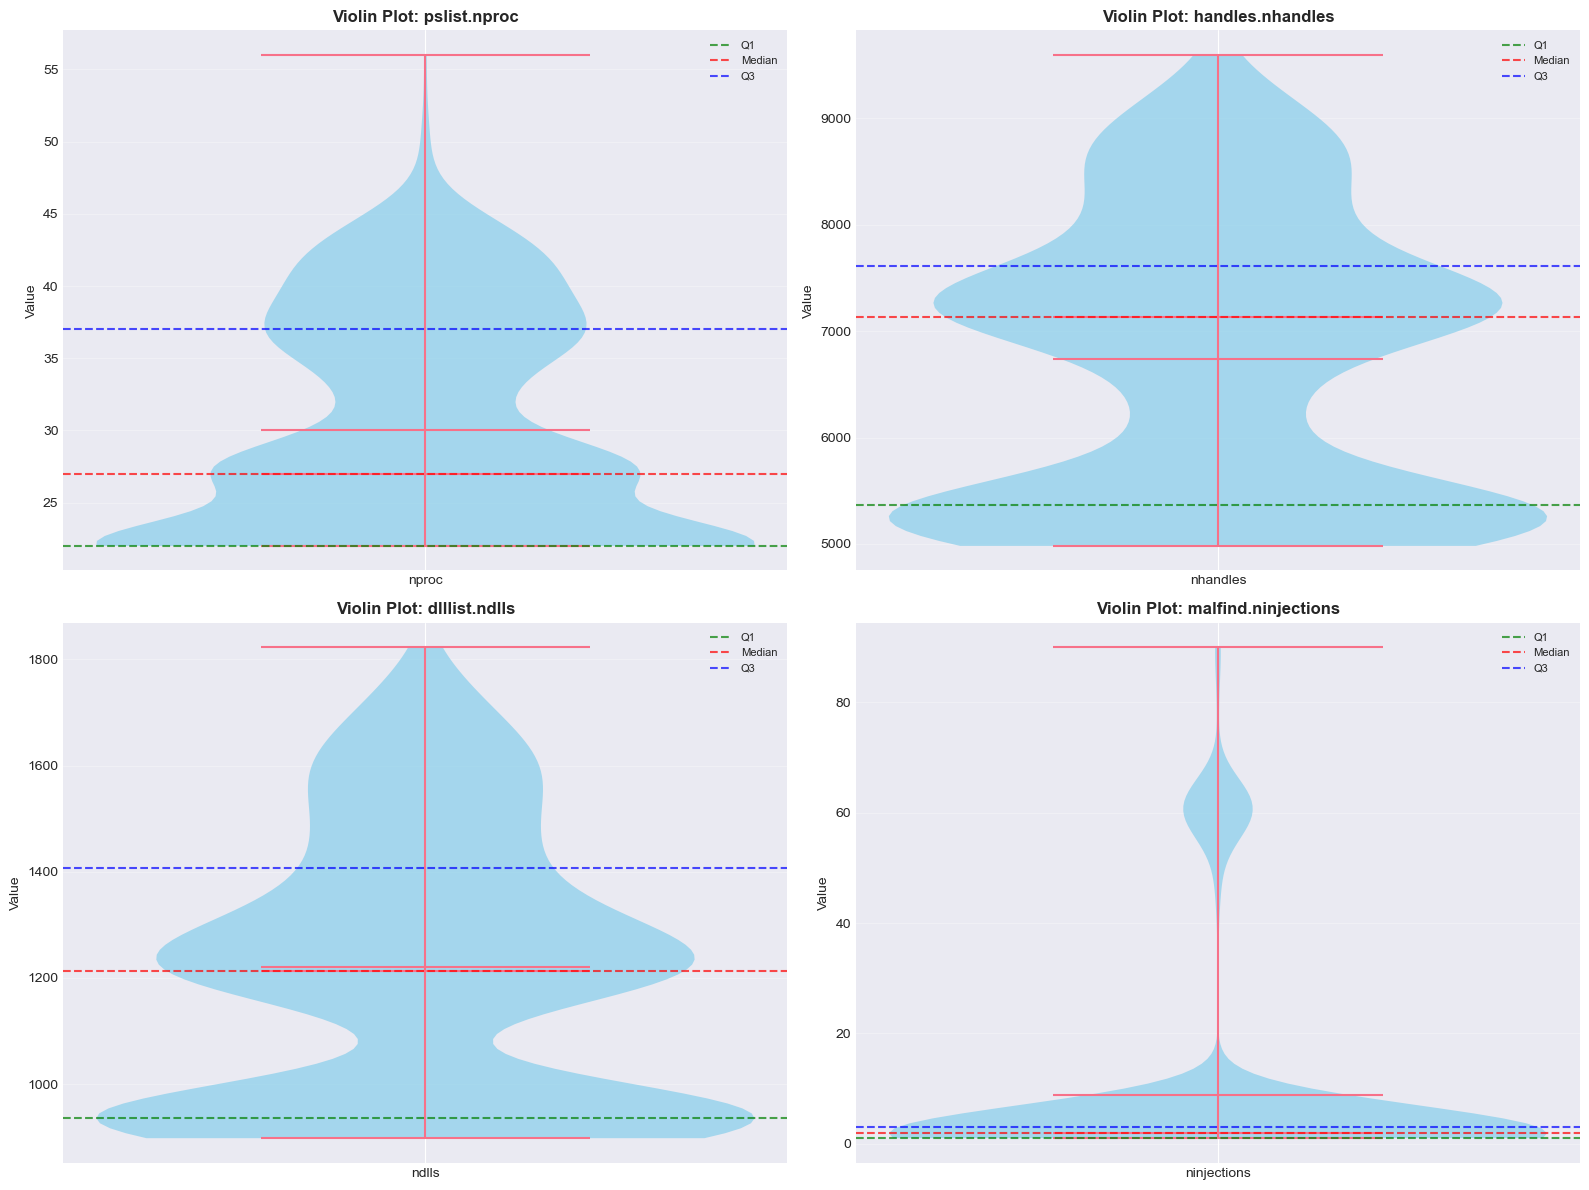

✅ Violin plot analysis completed!


In [5]:
# Violin Plots - Detailed Distribution Analysis
print("=" * 80)
print("Violin Plots - Detailed Feature Distributions")
print("=" * 80)

violin_features = ['pslist.nproc', 'handles.nhandles', 'dlllist.ndlls', 'malfind.ninjections']
violin_features = [f for f in violin_features if f in df_combined.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(violin_features):
    # Create violin plot
    parts = axes[idx].violinplot([df_combined[feature].dropna()], positions=[1], 
                                  showmeans=True, showmedians=True)
    
    # Customize violin plot colors
    for pc in parts['bodies']:
        pc.set_facecolor('skyblue')
        pc.set_alpha(0.7)
    
    axes[idx].set_title(f'Violin Plot: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xticks([1])
    axes[idx].set_xticklabels([feature.split('.')[-1]])
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add quartile lines
    q1 = df_combined[feature].quantile(0.25)
    q2 = df_combined[feature].quantile(0.50)
    q3 = df_combined[feature].quantile(0.75)
    axes[idx].axhline(y=q1, color='green', linestyle='--', alpha=0.7, label='Q1')
    axes[idx].axhline(y=q2, color='red', linestyle='--', alpha=0.7, label='Median')
    axes[idx].axhline(y=q3, color='blue', linestyle='--', alpha=0.7, label='Q3')
    axes[idx].legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

print("✅ Violin plot analysis completed!")


In [6]:
# Data Information
print("=" * 80)
print("Dataset Information")
print("=" * 80)
print(f"\nColumn Names ({len(df_combined.columns)} total):")
print(df_combined.columns.tolist())

print(f"\n\nData Types:")
print(df_combined.dtypes.value_counts())

print(f"\n\nMissing Values:")
missing = df_combined.isnull().sum()
missing_pct = (missing / len(df_combined)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

print(f"\n\nBasic Statistics:")
df_combined.describe()


Dataset Information

Column Names (56 total):
['Filename', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads', 'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile', 'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread', 'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg', 'ldrmodules.not_in_mem_avg', 'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection', 'malfind.uniqueInjections', 'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_session', 'psxview.not_in_deskthrd', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_eprocess_pool_false

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,ldrmodules.not_in_load_avg,ldrmodules.not_in_init_avg,ldrmodules.not_in_mem_avg,malfind.ninjections,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist,psxview.not_in_eprocess_pool,psxview.not_in_ethread_pool,psxview.not_in_pspcid_list,psxview.not_in_csrss_handles,psxview.not_in_session,psxview.not_in_deskthrd,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_csrss_handles_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,850.000000,850.000000,850.000000,850.0,850.000000,850.000000,850.000000,850.000000,850.000000,850.0,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.0,850.000000,850.000000,850.0,850.000000,850.000000,850.0,850.0
mean,30.023529,11.245882,12.716771,0.0,229.246168,1220.974118,41.246487,6742.234118,230.102223,0.0,581.480000,2264.034118,31.791765,510.264706,626.644706,77.417647,488.821176,101.172941,117.595294,208.057647,33.882353,62.768235,33.884706,0.026818,0.049694,0.026820,8.842353,2055.671765,53.054118,2.343829,0.638824,0.004706,0.80000,0.638824,4.804706,2.638824,5.992941,0.017205,0.000200,0.020972,0.017205,0.160982,0.087110,0.199294,137.509412,386.814118,220.480000,26.0,23.442353,114.891765,0.0,117.369412,87.752941,0.0,8.0
std,7.780826,3.468113,2.374166,0.0,27.605519,253.373897,3.105458,1315.999608,26.708279,0.0,132.897368,532.871575,8.090779,141.350567,87.897873,16.060792,104.679627,14.486970,43.819535,34.820931,9.142520,16.604431,9.145641,0.002475,0.004064,0.002476,19.485577,5829.809638,116.913464,3.786066,1.267571,0.068478,1.41671,1.267571,1.417367,1.267571,1.709103,0.032129,0.002916,0.034258,0.032129,0.034972,0.030229,0.034686,0.500206,2.509964,0.557802,0.0,0.656287,1.310482,0.0,3.131211,0.529593,0.0,0.0
min,22.000000,8.000000,7.910714,0.0,157.107143,898.000000,30.000000,4982.000000,164.540541,0.0,354.000000,1570.000000,23.000000,336.000000,458.000000,60.000000,369.000000,84.000000,69.000000,162.000000,16.000000,37.000000,16.000000,0.017525,0.040526,0.017525,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.00000,0.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.088889,0.035714,0.105263,137.000000,378.000000,219.000000,26.0,21.000000,110.000000,0.0,112.000000,86.000000,0.0,8.0
25%,22.000000,8.000000,10.260425,0.0,207.884727,936.000000,38.634398,5363.000000,209.213690,0.0,478.000000,1688.000000,23.000000,353.000000,597.000000,61.000000,376.000000,85.000000,71.000000,170.000000,25.000000,46.000000,25.000000,0.025078,0.046950,0.025078,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.00000,0.000000,4.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.139535,0.071429,0.178571,137.000000,385.000000,220.000000,26.0,23.000000,114.000000,0.0,114.000000,88.000000,0.0,8.0
50%,27.000000,9.000000,13.363636,0.0,232.068182,1213.000000,42.454545,7136.500000,232.068182,0.0,542.000000,2299.0000

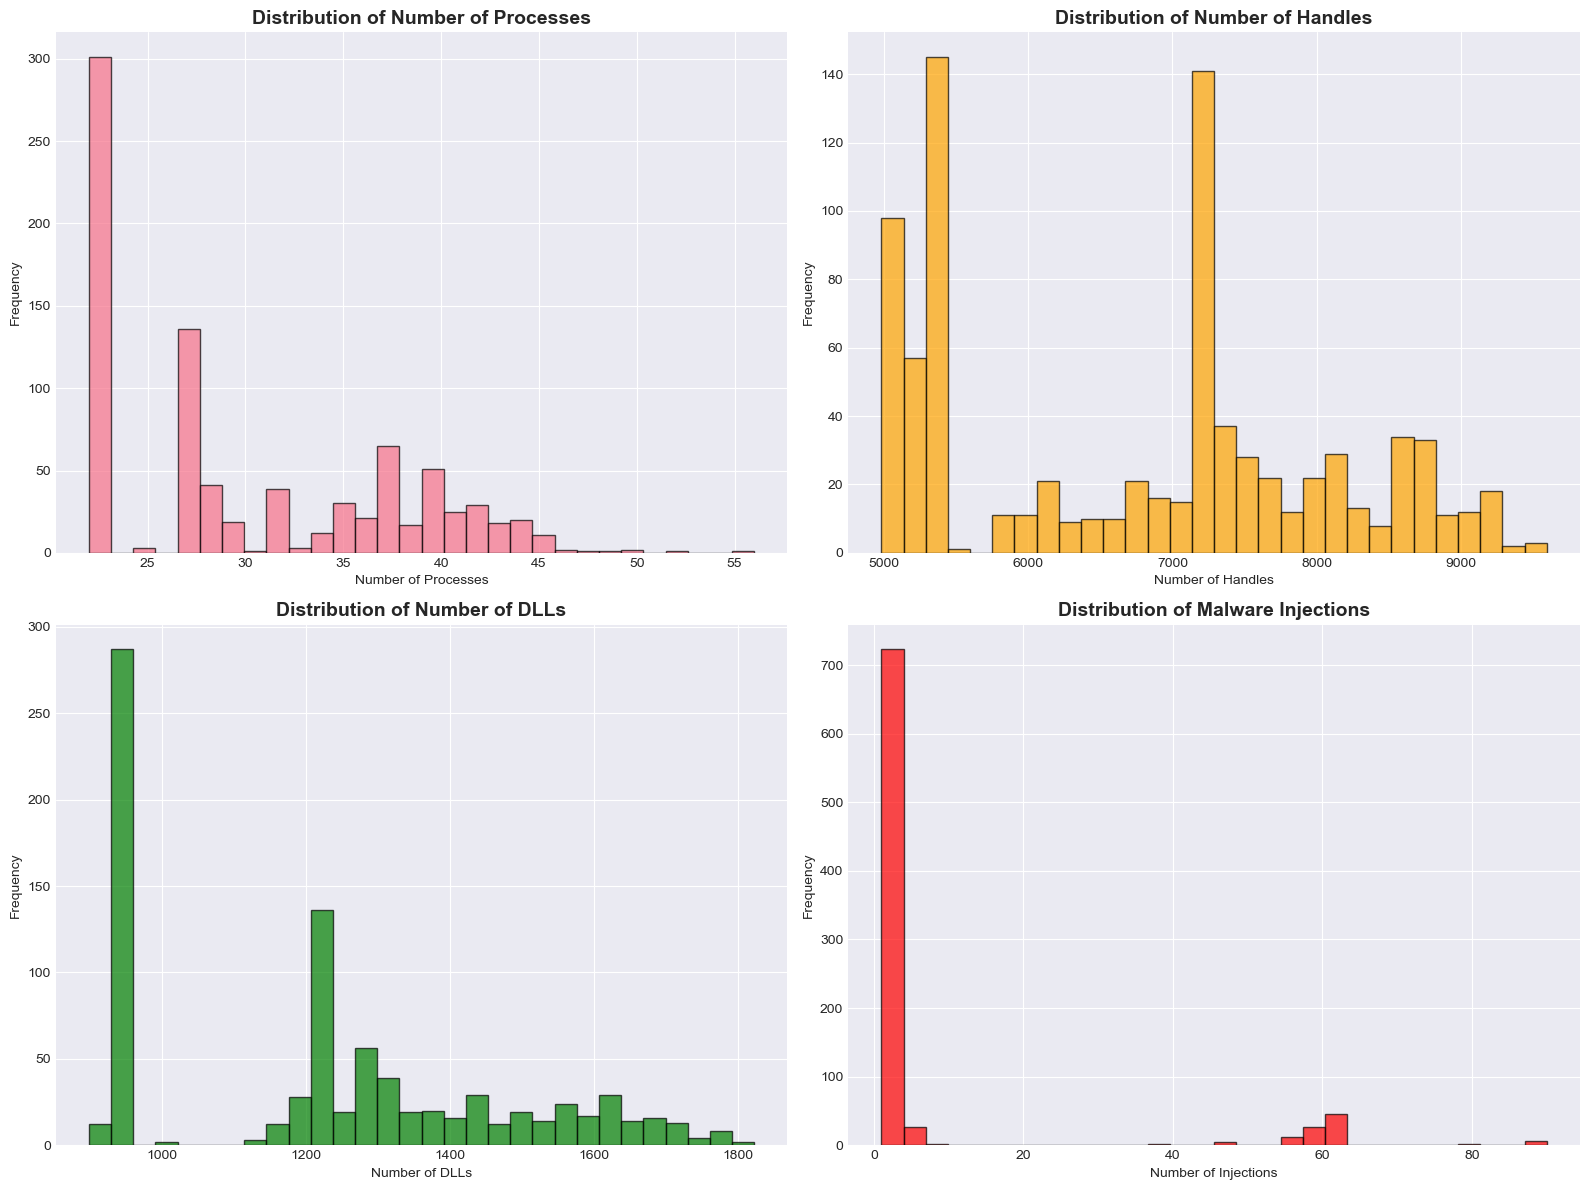

✅ Data visualization completed!


In [7]:
# Visualize data distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of key features
axes[0, 0].hist(df_combined['pslist.nproc'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Number of Processes', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Processes')
axes[0, 0].set_ylabel('Frequency')

# 2. Distribution of handles
axes[0, 1].hist(df_combined['handles.nhandles'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution of Number of Handles', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Handles')
axes[0, 1].set_ylabel('Frequency')

# 3. Distribution of DLLs
axes[1, 0].hist(df_combined['dlllist.ndlls'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Distribution of Number of DLLs', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of DLLs')
axes[1, 0].set_ylabel('Frequency')

# 4. Distribution of malware injections
axes[1, 1].hist(df_combined['malfind.ninjections'], bins=30, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('Distribution of Malware Injections', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Injections')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("✅ Data visualization completed!")


## Step 2: Data Preprocessing

Prepare the data for One-Class SVM training by:
- Removing non-numeric columns (Filename)
- Handling missing values
- Feature scaling


In [8]:
# Preprocess data for One-Class SVM
print("=" * 80)
print("Data Preprocessing")
print("=" * 80)

# Store filename column for later reference
filenames = df_combined['Filename'].copy()

# Remove filename column (non-numeric)
df_features = df_combined.drop(columns=['Filename'])

# Check for any remaining non-numeric columns
non_numeric_cols = df_features.select_dtypes(include=['object']).columns.tolist()
if non_numeric_cols:
    print(f"⚠️ Found non-numeric columns: {non_numeric_cols}")
    df_features = df_features.drop(columns=non_numeric_cols)

print(f"\nFeatures shape: {df_features.shape}")
print(f"Feature columns: {len(df_features.columns)}")

# Handle missing values (fill with median)
if df_features.isnull().sum().sum() > 0:
    print(f"\nFilling {df_features.isnull().sum().sum()} missing values with median...")
    df_features = df_features.fillna(df_features.median())
else:
    print("\n✅ No missing values found!")

# Check for infinite values
inf_count = np.isinf(df_features.select_dtypes(include=[np.number])).sum().sum()
if inf_count > 0:
    print(f"\n⚠️ Found {inf_count} infinite values. Replacing with NaN then median...")
    df_features = df_features.replace([np.inf, -np.inf], np.nan)
    df_features = df_features.fillna(df_features.median())

print(f"\n✅ Preprocessing complete! Final shape: {df_features.shape}")
print(f"Feature names: {list(df_features.columns[:10])}..." if len(df_features.columns) > 10 else f"Feature names: {list(df_features.columns)}")


Data Preprocessing

Features shape: (850, 55)
Feature columns: 55

✅ No missing values found!

✅ Preprocessing complete! Final shape: (850, 55)
Feature names: ['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads', 'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nport']...


## Step 3: Train One-Class SVM Model

Train One-Class SVM model on the data. For anomaly detection, we'll use the entire dataset as "normal" behavior and the model will learn to identify deviations.


In [9]:
# Advanced Anomaly Visualizations - Box Plots Comparing Normal vs Anomaly
print("=" * 80)
print("Feature Comparison: Normal vs Anomaly (Box Plots)")
print("=" * 80)

# Select key features for comparison
compare_features = ['pslist.nproc', 'handles.nhandles', 'dlllist.ndlls', 'malfind.ninjections']
compare_features = [f for f in compare_features if f in results_df.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(compare_features):
    # Separate normal and anomaly data
    normal_data = results_df[results_df['Is_Anomaly'] == 0][feature].dropna()
    anomaly_data = results_df[results_df['Is_Anomaly'] == 1][feature].dropna()
    
    # Create box plot
    bp = axes[idx].boxplot([normal_data, anomaly_data], 
                           labels=['Normal', 'Anomaly'],
                           patch_artist=True, showmeans=True, meanline=True)
    
    # Color the boxes
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'{feature}: Normal vs Anomaly', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    normal_mean = normal_data.mean()
    anomaly_mean = anomaly_data.mean()
    textstr = f'Normal Mean: {normal_mean:.2f}\nAnomaly Mean: {anomaly_mean:.2f}\nDifference: {abs(anomaly_mean - normal_mean):.2f}'
    axes[idx].text(0.02, 0.98, textstr, transform=axes[idx].transAxes, 
                   fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✅ Normal vs Anomaly comparison completed!")


Feature Comparison: Normal vs Anomaly (Box Plots)


NameError: name 'results_df' is not defined

In [ ]:
# Violin Plots - Normal vs Anomaly Distribution Comparison
print("=" * 80)
print("Violin Plots: Normal vs Anomaly Distributions")
print("=" * 80)

violin_compare_features = ['pslist.nproc', 'handles.nhandles', 'dlllist.ndlls', 'malfind.ninjections']
violin_compare_features = [f for f in violin_compare_features if f in results_df.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(violin_compare_features):
    # Separate normal and anomaly data
    normal_data = results_df[results_df['Is_Anomaly'] == 0][feature].dropna()
    anomaly_data = results_df[results_df['Is_Anomaly'] == 1][feature].dropna()
    
    # Create violin plot
    parts = axes[idx].violinplot([normal_data, anomaly_data], positions=[1, 2],
                                 showmeans=True, showmedians=True)
    
    # Customize colors
    colors = ['lightgreen', 'lightcoral']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    axes[idx].set_title(f'{feature}: Distribution Comparison', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xticks([1, 2])
    axes[idx].set_xticklabels(['Normal', 'Anomaly'])
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add mean lines
    axes[idx].axhline(y=normal_data.mean(), xmin=0, xmax=0.5, color='green', 
                     linestyle='--', alpha=0.7, linewidth=2, label='Normal Mean')
    axes[idx].axhline(y=anomaly_data.mean(), xmin=0.5, xmax=1, color='red', 
                     linestyle='--', alpha=0.7, linewidth=2, label='Anomaly Mean')
    axes[idx].legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

print("✅ Violin plot comparison completed!")


In [ ]:
# Pair Plot - Multi-dimensional Feature Relationships
print("=" * 80)
print("Pair Plot Analysis - Feature Relationships")
print("=" * 80)

# Select top features for pair plot (limit to 4-5 features for readability)
pair_features = ['pslist.nproc', 'handles.nhandles', 'dlllist.ndlls', 'malfind.ninjections']
pair_features = [f for f in pair_features if f in results_df.columns]

# Sample data if too large for pair plot (for performance)
sample_size = min(1000, len(results_df))
df_sample = results_df.sample(n=sample_size, random_state=42) if len(results_df) > sample_size else results_df

# Create pair plot with hue based on anomaly status
pair_df = df_sample[pair_features + ['Is_Anomaly']].copy()

fig, axes = plt.subplots(len(pair_features), len(pair_features), figsize=(16, 16))

for i, feat1 in enumerate(pair_features):
    for j, feat2 in enumerate(pair_features):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: histogram
            normal_data = pair_df[pair_df['Is_Anomaly'] == 0][feat1].dropna()
            anomaly_data = pair_df[pair_df['Is_Anomaly'] == 1][feat1].dropna()
            ax.hist(normal_data, bins=20, alpha=0.6, color='green', label='Normal', edgecolor='black')
            ax.hist(anomaly_data, bins=20, alpha=0.6, color='red', label='Anomaly', edgecolor='black')
            ax.set_ylabel('Frequency')
        else:
            # Off-diagonal: scatter plot
            normal_mask = pair_df['Is_Anomaly'] == 0
            anomaly_mask = pair_df['Is_Anomaly'] == 1
            
            ax.scatter(pair_df.loc[normal_mask, feat2], pair_df.loc[normal_mask, feat1],
                      alpha=0.5, c='green', s=20, label='Normal', edgecolors='black', linewidths=0.5)
            ax.scatter(pair_df.loc[anomaly_mask, feat2], pair_df.loc[anomaly_mask, feat1],
                      alpha=0.5, c='red', s=20, label='Anomaly', edgecolors='black', linewidths=0.5)
        
        # Set labels
        if i == len(pair_features) - 1:
            ax.set_xlabel(feat2.split('.')[-1], fontsize=9)
        if j == 0:
            ax.set_ylabel(feat1.split('.')[-1], fontsize=9)
        
        # Remove ticks for cleaner look
        ax.tick_params(labelsize=7)
        ax.grid(True, alpha=0.3)

plt.suptitle('Pair Plot: Feature Relationships (Normal vs Anomaly)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"✅ Pair plot analysis completed! (Sample size: {len(df_sample)} rows)")


In [ ]:
# Feature Statistics Summary Visualization
print("=" * 80)
print("Feature Statistics Summary")
print("=" * 80)

# Calculate statistics for key features
key_stats_features = ['pslist.nproc', 'handles.nhandles', 'dlllist.ndlls', 'malfind.ninjections',
                      'pslist.avg_threads', 'handles.nport', 'handles.nfile']
key_stats_features = [f for f in key_stats_features if f in results_df.columns]

# Create summary statistics dataframe
stats_summary = []
for feature in key_stats_features:
    normal_data = results_df[results_df['Is_Anomaly'] == 0][feature].dropna()
    anomaly_data = results_df[results_df['Is_Anomaly'] == 1][feature].dropna()
    
    stats_summary.append({
        'Feature': feature.split('.')[-1],
        'Normal_Mean': normal_data.mean(),
        'Normal_Std': normal_data.std(),
        'Anomaly_Mean': anomaly_data.mean(),
        'Anomaly_Std': anomaly_data.std(),
        'Difference': abs(anomaly_data.mean() - normal_data.mean()),
        'Normal_Median': normal_data.median(),
        'Anomaly_Median': anomaly_data.median()
    })

stats_df = pd.DataFrame(stats_summary)

# Visualize statistics comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Mean comparison
x_pos = np.arange(len(stats_df))
width = 0.35
axes[0, 0].bar(x_pos - width/2, stats_df['Normal_Mean'], width, label='Normal', 
               color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 0].bar(x_pos + width/2, stats_df['Anomaly_Mean'], width, label='Anomaly', 
               color='lightcoral', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Features')
axes[0, 0].set_ylabel('Mean Value')
axes[0, 0].set_title('Mean Comparison: Normal vs Anomaly', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(stats_df['Feature'], rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Standard deviation comparison
axes[0, 1].bar(x_pos - width/2, stats_df['Normal_Std'], width, label='Normal', 
               color='lightblue', alpha=0.7, edgecolor='black')
axes[0, 1].bar(x_pos + width/2, stats_df['Anomaly_Std'], width, label='Anomaly', 
               color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Features')
axes[0, 1].set_ylabel('Standard Deviation')
axes[0, 1].set_title('Std Dev Comparison: Normal vs Anomaly', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(stats_df['Feature'], rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Difference in means
axes[1, 0].barh(range(len(stats_df)), stats_df['Difference'], 
                color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 0].set_yticks(range(len(stats_df)))
axes[1, 0].set_yticklabels(stats_df['Feature'])
axes[1, 0].set_xlabel('Absolute Difference in Means')
axes[1, 0].set_title('Feature Discriminative Power (Difference in Means)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Median comparison
axes[1, 1].bar(x_pos - width/2, stats_df['Normal_Median'], width, label='Normal', 
               color='lightgreen', alpha=0.7, edgecolor='black')
axes[1, 1].bar(x_pos + width/2, stats_df['Anomaly_Median'], width, label='Anomaly', 
               color='lightcoral', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Median Value')
axes[1, 1].set_title('Median Comparison: Normal vs Anomaly', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(stats_df['Feature'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Display statistics table
print("\n" + "=" * 80)
print("Detailed Statistics Summary")
print("=" * 80)
print(stats_df.to_string(index=False))

print("\n✅ Statistics summary visualization completed!")


In [ ]:
# Split data for training and testing
# For One-Class SVM, we train on all data to learn normal patterns
# Then we can use it to detect anomalies

X = df_features.values
print(f"Data shape: {X.shape}")

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features scaled successfully!")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean: {X_scaled.mean():.6f}, Std: {X_scaled.std():.6f}")


In [ ]:
# Train One-Class SVM Model
print("=" * 80)
print("Training One-Class SVM Model")
print("=" * 80)
print("(Recommended by Eng Mariam for anomaly detection)")

# Model parameters
nu = 0.1  # Expected fraction of outliers (10%)
gamma = 'scale'  # Kernel coefficient
kernel = 'rbf'  # Radial Basis Function kernel

print(f"\nModel Parameters:")
print(f"  nu (outlier fraction): {nu}")
print(f"  gamma: {gamma}")
print(f"  kernel: {kernel}")

# Initialize and train model
ocsvm_model = OneClassSVM(
    nu=nu,
    gamma=gamma,
    kernel=kernel,
    random_state=42
)

print("\nTraining model... (this may take a few minutes)")
ocsvm_model.fit(X_scaled)

print("✅ Model training completed!")

# Get predictions on training data
train_predictions = ocsvm_model.predict(X_scaled)
train_scores = ocsvm_model.decision_function(X_scaled)

# Statistics
n_normal = (train_predictions == 1).sum()
n_anomaly = (train_predictions == -1).sum()

print(f"\nModel Statistics:")
print(f"  Support vectors: {ocsvm_model.n_support_[0]}")
print(f"  Samples predicted as normal: {n_normal} ({n_normal/len(train_predictions)*100:.2f}%)")
print(f"  Samples predicted as anomaly: {n_anomaly} ({n_anomaly/len(train_predictions)*100:.2f}%)")
print(f"  Decision score range: [{train_scores.min():.2f}, {train_scores.max():.2f}]")


NameError: name 'train_scores' is not defined

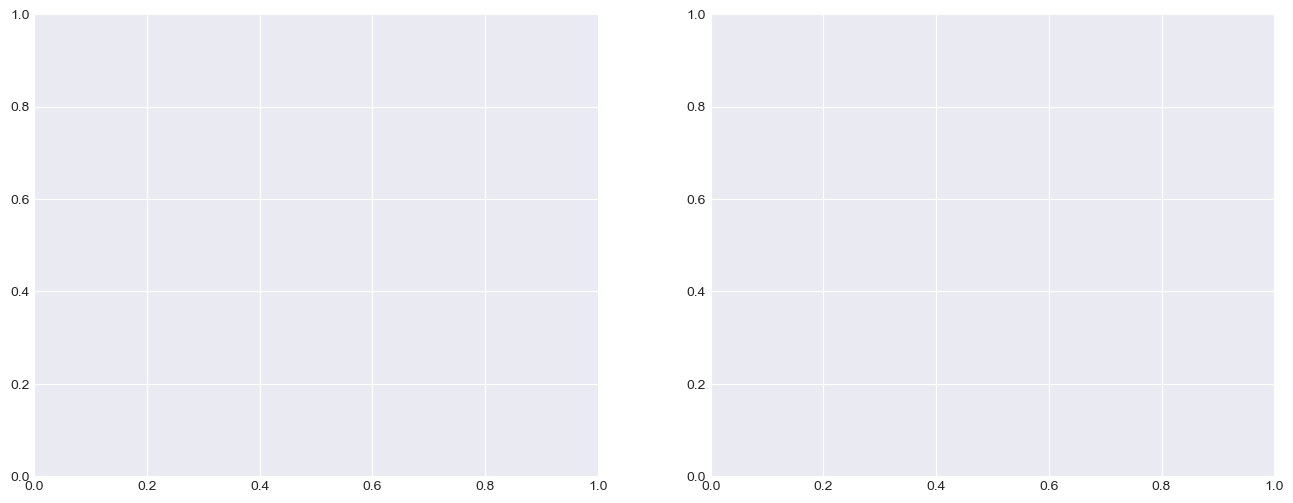

In [10]:
# Visualize model predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Decision scores distribution
axes[0].hist(train_scores, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Decision Boundary')
axes[0].set_title('Distribution of Decision Scores', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Decision Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Predictions distribution
pred_counts = pd.Series(train_predictions).value_counts().sort_index()
axes[1].bar(['Anomaly (-1)', 'Normal (1)'], [pred_counts.get(-1, 0), pred_counts.get(1, 0)], 
            color=['red', 'green'], alpha=0.7, edgecolor='black')
axes[1].set_title('Model Predictions Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✅ Model visualization completed!")


SIEM Dashboard - Comprehensive Summary View


NameError: name 'alerts_df' is not defined

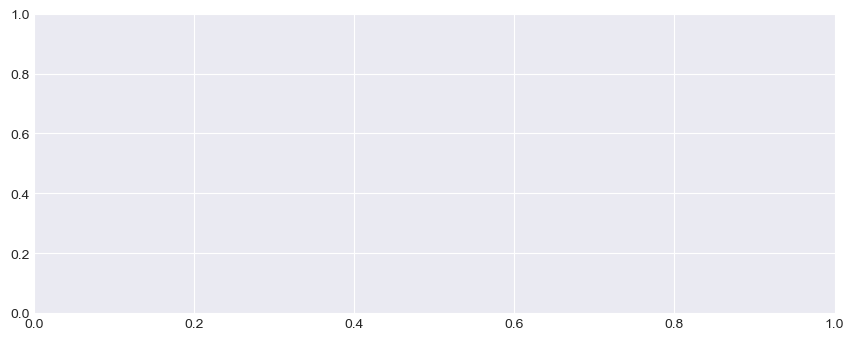

In [11]:
# Comprehensive SIEM Dashboard Summary View
print("=" * 80)
print("SIEM Dashboard - Comprehensive Summary View")
print("=" * 80)

# Create a comprehensive dashboard figure
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# 1. Alert Severity Distribution (Top Left - Large)
ax1 = fig.add_subplot(gs[0, 0:2])
severity_counts = alerts_df['severity'].value_counts().reindex(['critical', 'high', 'medium', 'low'], fill_value=0)
colors = {'critical': 'darkred', 'high': 'red', 'medium': 'orange', 'low': 'yellow'}
bars = ax1.bar(severity_counts.index, severity_counts.values, 
               color=[colors[s] for s in severity_counts.index], alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_title('Alert Severity Distribution', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Severity Level', fontsize=12)
ax1.set_ylabel('Number of Alerts', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')
for i, (bar, v) in enumerate(zip(bars, severity_counts.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(v),
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Anomaly Score Distribution (Top Right)
ax2 = fig.add_subplot(gs[0, 2:])
ax2.hist(alerts_df['anomaly_score'], bins=25, color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.axvline(alerts_df['anomaly_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {alerts_df["anomaly_score"].mean():.2f}')
ax2.axvline(alerts_df['anomaly_score'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {alerts_df["anomaly_score"].median():.2f}')
ax2.set_title('Anomaly Score Distribution', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Anomaly Score', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Key Indicators Comparison (Middle Left)
ax3 = fig.add_subplot(gs[1, 0:2])
if len(key_indicators_df.columns) > 0:
    indicator_totals = key_indicators_df.sum().sort_values(ascending=True).tail(8)
    ax3.barh(range(len(indicator_totals)), indicator_totals.values, 
            color='coral', alpha=0.7, edgecolor='black', linewidth=1.5)
    ax3.set_yticks(range(len(indicator_totals)))
    ax3.set_yticklabels([col.replace('_', ' ').title() for col in indicator_totals.index], fontsize=10)
    ax3.set_xlabel('Total Count', fontsize=11)
    ax3.set_title('Top Key Indicators in Alerts', fontsize=13, fontweight='bold', pad=10)
    ax3.grid(True, alpha=0.3, axis='x')
    for i, v in enumerate(indicator_totals.values):
        ax3.text(v + max(indicator_totals.values) * 0.01, i, f'{int(v)}', 
                va='center', fontweight='bold', fontsize=9)

# 4. Severity vs Key Metrics (Middle Right)
ax4 = fig.add_subplot(gs[1, 2:])
if 'num_processes' in alerts_extended.columns and 'num_handles' in alerts_extended.columns:
    scatter = ax4.scatter(alerts_extended['num_processes'], alerts_extended['num_handles'],
                        c=[severity_order.get(s, 3) for s in alerts_df['severity']],
                        cmap='RdYlGn_r', s=120, alpha=0.7, edgecolors='black', linewidth=1)
    ax4.set_xlabel('Number of Processes', fontsize=11)
    ax4.set_ylabel('Number of Handles', fontsize=11)
    ax4.set_title('Processes vs Handles (Colored by Severity)', fontsize=13, fontweight='bold', pad=10)
    ax4.grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('Severity Level', fontsize=10)

# 5. Decision Score Analysis (Bottom Left)
ax5 = fig.add_subplot(gs[2, 0])
normal_decisions = results_df[results_df['Is_Anomaly'] == 0]['Decision_Score']
anomaly_decisions = results_df[results_df['Is_Anomaly'] == 1]['Decision_Score']
ax5.hist(normal_decisions, bins=25, alpha=0.6, label='Normal', color='green', edgecolor='black', linewidth=1)
ax5.hist(anomaly_decisions, bins=25, alpha=0.6, label='Anomaly', color='red', edgecolor='black', linewidth=1)
ax5.axvline(x=0, color='blue', linestyle='--', linewidth=2, label='Decision Boundary')
ax5.set_xlabel('Decision Score', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.set_title('Decision Score Distribution', fontsize=12, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# 6. Alert Statistics Summary (Bottom Middle)
ax6 = fig.add_subplot(gs[2, 1])
stats_text = f"""
Total Alerts: {len(alerts_df)}
Critical: {len(alerts_df[alerts_df['severity'] == 'critical'])}
High: {len(alerts_df[alerts_df['severity'] == 'high'])}
Medium: {len(alerts_df[alerts_df['severity'] == 'medium'])}
Low: {len(alerts_df[alerts_df['severity'] == 'low'])}

Avg Anomaly Score: {alerts_df['anomaly_score'].mean():.2f}
Max Anomaly Score: {alerts_df['anomaly_score'].max():.2f}
Min Anomaly Score: {alerts_df['anomaly_score'].min():.2f}

Detection Rate: {(results_df['Is_Anomaly'].sum() / len(results_df) * 100):.2f}%
"""
ax6.text(0.1, 0.5, stats_text, transform=ax6.transAxes, fontsize=11,
         verticalalignment='center', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
ax6.set_title('Alert Statistics Summary', fontsize=12, fontweight='bold')
ax6.axis('off')

# 7. Feature Correlation with Anomaly (Bottom Right - 2 columns)
ax7 = fig.add_subplot(gs[2, 2:])
if len(key_indicators_df.columns) > 0:
    # Calculate correlation between indicators and anomaly score
    indicator_corr = key_indicators_df.corrwith(alerts_df['anomaly_score']).abs().sort_values(ascending=True).tail(6)
    ax7.barh(range(len(indicator_corr)), indicator_corr.values, 
            color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
    ax7.set_yticks(range(len(indicator_corr)))
    ax7.set_yticklabels([col.replace('_', ' ').title() for col in indicator_corr.index], fontsize=9)
    ax7.set_xlabel('Correlation with Anomaly Score', fontsize=10)
    ax7.set_title('Top Indicators Correlated with Anomaly Score', fontsize=12, fontweight='bold')
    ax7.grid(True, alpha=0.3, axis='x')
    for i, v in enumerate(indicator_corr.values):
        ax7.text(v + max(indicator_corr.values) * 0.02, i, f'{v:.3f}', 
                va='center', fontweight='bold', fontsize=9)

# Add main title
fig.suptitle('SIEM Security Dashboard - Comprehensive Analysis', 
             fontsize=18, fontweight='bold', y=0.995)

plt.show()

print("✅ Comprehensive SIEM dashboard visualization completed!")
print(f"\nDashboard Summary:")
print(f"  - Total Alerts: {len(alerts_df)}")
print(f"  - Critical Alerts: {len(alerts_df[alerts_df['severity'] == 'critical'])}")
print(f"  - High Alerts: {len(alerts_df[alerts_df['severity'] == 'high'])}")
print(f"  - Average Anomaly Score: {alerts_df['anomaly_score'].mean():.2f}")
print(f"  - Detection Rate: {(results_df['Is_Anomaly'].sum() / len(results_df) * 100):.2f}%")


In [12]:
# Advanced Alert Visualizations - Comprehensive SIEM Dashboard Views
print("=" * 80)
print("Advanced Alert Visualizations for SIEM Dashboard")
print("=" * 80)

# Extract key indicators from alerts
alerts_df = pd.DataFrame(alerts)
key_indicators_df = pd.json_normalize(alerts_df['key_indicators'])
alerts_extended = pd.concat([alerts_df[['severity', 'anomaly_score', 'decision_score']], 
                            key_indicators_df], axis=1)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Severity pie chart
severity_counts = alerts_df['severity'].value_counts()
colors_pie = {'critical': 'darkred', 'high': 'red', 'medium': 'orange', 'low': 'yellow'}
pie_colors = [colors_pie.get(s, 'gray') for s in severity_counts.index]
axes[0, 0].pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%',
               colors=pie_colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[0, 0].set_title('Alert Severity Distribution (Pie Chart)', fontsize=12, fontweight='bold')

# 2. Anomaly score by severity (box plot)
severity_order_list = ['critical', 'high', 'medium', 'low']
severity_data = [alerts_df[alerts_df['severity'] == s]['anomaly_score'].values 
                 for s in severity_order_list if s in alerts_df['severity'].values]
severity_labels = [s for s in severity_order_list if s in alerts_df['severity'].values]

if severity_data:
    bp = axes[0, 1].boxplot(severity_data, labels=severity_labels, patch_artist=True, showmeans=True)
    colors_box = [colors_pie.get(s, 'gray') for s in severity_labels]
    for patch, color in zip(bp['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[0, 1].set_title('Anomaly Score Distribution by Severity', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Anomaly Score')
    axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Key indicators heatmap
if len(key_indicators_df.columns) > 0:
    indicator_means = key_indicators_df.groupby(alerts_df['severity']).mean()
    sns.heatmap(indicator_means.T, annot=True, fmt='.2f', cmap='YlOrRd', 
                ax=axes[0, 2], cbar_kws={"shrink": 0.8})
    axes[0, 2].set_title('Average Key Indicators by Severity', fontsize=12, fontweight='bold')
    axes[0, 2].set_xlabel('Severity')
    axes[0, 2].set_ylabel('Key Indicators')

# 4. Scatter: Processes vs Handles colored by severity
if 'num_processes' in alerts_extended.columns and 'num_handles' in alerts_extended.columns:
    scatter = axes[1, 0].scatter(alerts_extended['num_processes'], alerts_extended['num_handles'],
                                 c=[severity_order.get(s, 3) for s in alerts_df['severity']],
                                 cmap='RdYlGn_r', s=100, alpha=0.6, edgecolors='black')
    axes[1, 0].set_xlabel('Number of Processes', fontsize=11)
    axes[1, 0].set_ylabel('Number of Handles', fontsize=11)
    axes[1, 0].set_title('Processes vs Handles (by Severity)', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=axes[1, 0])
    cbar.set_label('Severity')

# 5. Stacked bar chart: Key indicators by severity
if len(key_indicators_df.columns) > 0:
    indicator_by_severity = key_indicators_df.groupby(alerts_df['severity']).sum()
    indicator_by_severity = indicator_by_severity.reindex(severity_order_list, fill_value=0)
    
    indicator_by_severity.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                              color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'][:len(indicator_by_severity.columns)],
                              edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('Key Indicators Sum by Severity (Stacked)', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Severity')
    axes[1, 1].set_ylabel('Total Count')
    axes[1, 1].legend(title='Indicators', fontsize=8, title_fontsize=9)
    axes[1, 1].tick_params(axis='x', rotation=0)
    axes[1, 1].grid(True, alpha=0.3, axis='y')

# 6. Decision score vs Anomaly score
scatter = axes[1, 2].scatter(alerts_df['decision_score'], alerts_df['anomaly_score'],
                            c=[severity_order.get(s, 3) for s in alerts_df['severity']],
                            cmap='RdYlGn_r', s=100, alpha=0.6, edgecolors='black')
axes[1, 2].set_xlabel('Decision Score', fontsize=11)
axes[1, 2].set_ylabel('Anomaly Score', fontsize=11)
axes[1, 2].set_title('Decision Score vs Anomaly Score', fontsize=12, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1, 2])
cbar.set_label('Severity')

plt.tight_layout()
plt.show()

print("✅ Advanced alert visualizations completed!")


Advanced Alert Visualizations for SIEM Dashboard


NameError: name 'alerts' is not defined

In [13]:
# Save model and scaler
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, 'one_class_svm_model.pkl')
scaler_path = os.path.join(model_dir, 'standard_scaler.pkl')
feature_names_path = os.path.join(model_dir, 'feature_names.json')

joblib.dump(ocsvm_model, model_path)
joblib.dump(scaler, scaler_path)

# Save feature names
feature_names = df_features.columns.tolist()
with open(feature_names_path, 'w') as f:
    json.dump(feature_names, f)

print("✅ Model and scaler saved successfully!")
print(f"  Model: {model_path}")
print(f"  Scaler: {scaler_path}")
print(f"  Feature names: {feature_names_path}")


NameError: name 'ocsvm_model' is not defined

## Step 4: Anomaly Detection on New Data

Detect anomalies in the dataset and identify potential security threats.


In [14]:
# Detect anomalies
print("=" * 80)
print("Anomaly Detection")
print("=" * 80)

# Get predictions and scores
predictions = ocsvm_model.predict(X_scaled)
decision_scores = ocsvm_model.decision_function(X_scaled)

# Create results dataframe
results_df = pd.DataFrame({
    'Filename': filenames,
    'Prediction': predictions,
    'Decision_Score': decision_scores,
    'Is_Anomaly': (predictions == -1).astype(int)
})

# Add original features for analysis
results_df = pd.concat([results_df, df_features.reset_index(drop=True)], axis=1)

print(f"\nDetection Results:")
print(f"  Total samples: {len(results_df)}")
print(f"  Normal samples: {(results_df['Is_Anomaly'] == 0).sum()} ({(results_df['Is_Anomaly'] == 0).sum()/len(results_df)*100:.2f}%)")
print(f"  Anomaly samples: {(results_df['Is_Anomaly'] == 1).sum()} ({(results_df['Is_Anomaly'] == 1).sum()/len(results_df)*100:.2f}%)")

# Display top anomalies (lowest decision scores)
print("\n" + "=" * 80)
print("Top 10 Anomalies (Lowest Decision Scores)")
print("=" * 80)
top_anomalies = results_df.nsmallest(10, 'Decision_Score')[['Filename', 'Decision_Score', 'Is_Anomaly', 
                                                             'malfind.ninjections', 'pslist.nproc', 'handles.nhandles']]
print(top_anomalies.to_string(index=False))


Anomaly Detection


NameError: name 'ocsvm_model' is not defined

NameError: name 'results_df' is not defined

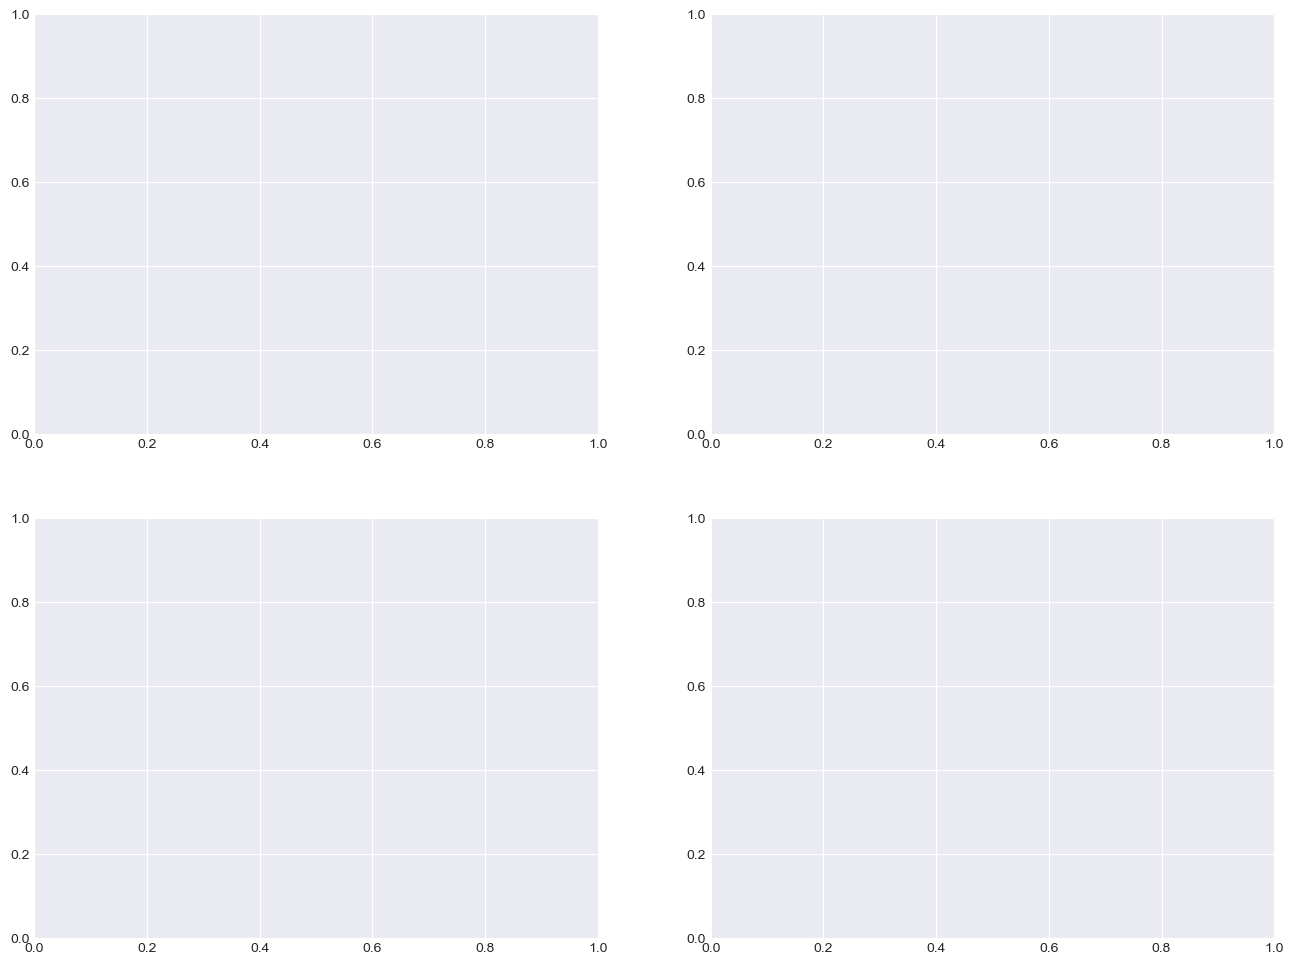

In [15]:
# Visualize anomalies
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Decision scores vs Malware injections
scatter = axes[0, 0].scatter(results_df['malfind.ninjections'], results_df['Decision_Score'], 
                             c=results_df['Is_Anomaly'], cmap='RdYlGn', alpha=0.6, edgecolors='black')
axes[0, 0].set_xlabel('Malware Injections', fontsize=12)
axes[0, 0].set_ylabel('Decision Score', fontsize=12)
axes[0, 0].set_title('Decision Score vs Malware Injections', fontsize=14, fontweight='bold')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 0], label='Anomaly (1) / Normal (0)')

# 2. Decision scores vs Number of processes
scatter = axes[0, 1].scatter(results_df['pslist.nproc'], results_df['Decision_Score'], 
                             c=results_df['Is_Anomaly'], cmap='RdYlGn', alpha=0.6, edgecolors='black')
axes[0, 1].set_xlabel('Number of Processes', fontsize=12)
axes[0, 1].set_ylabel('Decision Score', fontsize=12)
axes[0, 1].set_title('Decision Score vs Number of Processes', fontsize=14, fontweight='bold')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Anomaly (1) / Normal (0)')

# 3. Decision scores distribution by anomaly status
normal_scores = results_df[results_df['Is_Anomaly'] == 0]['Decision_Score']
anomaly_scores = results_df[results_df['Is_Anomaly'] == 1]['Decision_Score']

axes[1, 0].hist(normal_scores, bins=30, alpha=0.7, label='Normal', color='green', edgecolor='black')
axes[1, 0].hist(anomaly_scores, bins=30, alpha=0.7, label='Anomaly', color='red', edgecolor='black')
axes[1, 0].axvline(x=0, color='blue', linestyle='--', linewidth=2, label='Decision Boundary')
axes[1, 0].set_xlabel('Decision Score', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Decision Score Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature importance (correlation with decision scores)
feature_corr = df_features.corrwith(results_df['Decision_Score']).abs().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(feature_corr)), feature_corr.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 1].set_yticks(range(len(feature_corr)))
axes[1, 1].set_yticklabels(feature_corr.index, fontsize=9)
axes[1, 1].set_xlabel('Absolute Correlation with Decision Score', fontsize=12)
axes[1, 1].set_title('Top 10 Features Correlated with Anomaly Score', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Anomaly visualization completed!")


## Step 5: SIEM Integration - Generate Alerts

Create SIEM alerts for detected anomalies with severity levels and recommendations.


In [ ]:
# Generate SIEM Alerts
print("=" * 80)
print("SIEM Alert Generation")
print("=" * 80)

def calculate_severity(decision_score):
    """Calculate alert severity based on decision score"""
    score = abs(decision_score)
    if score > 10:
        return 'critical'
    elif score > 5:
        return 'high'
    elif score > 2:
        return 'medium'
    else:
        return 'low'

def generate_recommendations(row):
    """Generate security recommendations based on detected anomalies"""
    recommendations = []
    
    if row['malfind.ninjections'] > 0:
        recommendations.append("Investigate malware injection - check for code injection attacks")
    
    if row['psxview.not_in_pslist'] > 0:
        recommendations.append("Hidden process detected - investigate rootkit activity")
    
    if row['handles.nhandles'] > row['handles.nhandles'].quantile(0.95):
        recommendations.append("Unusually high number of handles - possible resource exhaustion attack")
    
    if row['dlllist.ndlls'] > row['dlllist.ndlls'].quantile(0.95):
        recommendations.append("High DLL count - check for DLL hijacking or injection")
    
    if not recommendations:
        recommendations.append("Investigate anomalous system behavior")
    
    return recommendations

# Generate alerts for anomalies only
anomalies = results_df[results_df['Is_Anomaly'] == 1].copy()

alerts = []
for idx, row in anomalies.iterrows():
    alert = {
        'alert_id': f"ALERT-{datetime.now().strftime('%Y%m%d%H%M%S')}-{idx}",
        'timestamp': datetime.now().isoformat(),
        'severity': calculate_severity(row['Decision_Score']),
        'status': 'new',
        'source': 'One-Class SVM Anomaly Detection',
        'anomaly_score': abs(row['Decision_Score']),
        'decision_score': row['Decision_Score'],
        'filename': row['Filename'],
        'key_indicators': {
            'malware_injections': int(row['malfind.ninjections']),
            'num_processes': int(row['pslist.nproc']),
            'num_handles': int(row['handles.nhandles']),
            'num_dlls': int(row['dlllist.ndlls']),
            'hidden_processes': int(row.get('psxview.not_in_pslist', 0))
        },
        'recommendations': generate_recommendations(row)
    }
    alerts.append(alert)

print(f"\n✅ Generated {len(alerts)} SIEM alerts")

# Display alert summary
alert_severity = {}
for alert in alerts:
    severity = alert['severity']
    alert_severity[severity] = alert_severity.get(severity, 0) + 1

print("\nAlert Summary by Severity:")
for severity, count in sorted(alert_severity.items(), key=lambda x: ['critical', 'high', 'medium', 'low'].index(x[0])):
    print(f"  {severity.upper()}: {count} alerts")


In [ ]:
# Display sample alerts
print("=" * 80)
print("Sample SIEM Alerts (Top 5 Critical/High)")
print("=" * 80)

# Sort alerts by severity and score
severity_order = {'critical': 0, 'high': 1, 'medium': 2, 'low': 3}
sorted_alerts = sorted(alerts, key=lambda x: (severity_order[x['severity']], -x['anomaly_score']))[:5]

for i, alert in enumerate(sorted_alerts, 1):
    print(f"\n{'='*80}")
    print(f"Alert #{i}")
    print(f"{'='*80}")
    print(f"Alert ID: {alert['alert_id']}")
    print(f"Timestamp: {alert['timestamp']}")
    print(f"Severity: {alert['severity'].upper()}")
    print(f"Filename: {alert['filename']}")
    print(f"Anomaly Score: {alert['anomaly_score']:.4f}")
    print(f"Decision Score: {alert['decision_score']:.4f}")
    print(f"\nKey Indicators:")
    for key, value in alert['key_indicators'].items():
        print(f"  - {key}: {value}")
    print(f"\nRecommendations:")
    for rec in alert['recommendations']:
        print(f"  - {rec}")


In [ ]:
# Save alerts to JSON file
alerts_file = 'siem_alerts.json'
with open(alerts_file, 'w') as f:
    json.dump(alerts, f, indent=2, default=str)

# Save results to CSV
results_file = 'detection_results.csv'
results_df.to_csv(results_file, index=False)

print(f"✅ Alerts saved to: {alerts_file}")
print(f"✅ Detection results saved to: {results_file}")
print(f"\nTotal alerts generated: {len(alerts)}")


## Step 6: Visualize Alert Distribution

Create visualizations to understand the distribution and patterns of detected anomalies.


In [ ]:
# Create alert visualization
alerts_df = pd.DataFrame(alerts)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Severity distribution
severity_counts = alerts_df['severity'].value_counts().reindex(['critical', 'high', 'medium', 'low'], fill_value=0)
colors = {'critical': 'darkred', 'high': 'red', 'medium': 'orange', 'low': 'yellow'}
axes[0, 0].bar(severity_counts.index, severity_counts.values, 
               color=[colors[s] for s in severity_counts.index], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Alert Distribution by Severity', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Severity Level')
axes[0, 0].set_ylabel('Number of Alerts')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(severity_counts.values):
    axes[0, 0].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# 2. Anomaly score distribution
axes[0, 1].hist(alerts_df['anomaly_score'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Anomaly Scores', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Anomaly Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# 3. Malware injections vs Anomaly score
scatter = axes[1, 0].scatter(alerts_df['key_indicators'].apply(lambda x: x['malware_injections']), 
                            alerts_df['anomaly_score'],
                            c=[severity_order[s] for s in alerts_df['severity']], 
                            cmap='RdYlGn_r', alpha=0.6, s=100, edgecolors='black')
axes[1, 0].set_xlabel('Malware Injections', fontsize=12)
axes[1, 0].set_ylabel('Anomaly Score', fontsize=12)
axes[1, 0].set_title('Malware Injections vs Anomaly Score', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1, 0])
cbar.set_label('Severity (0=Critical, 3=Low)')

# 4. Top features in anomalies
feature_importance = {}
for alert in alerts:
    for key, value in alert['key_indicators'].items():
        if value > 0:
            feature_importance[key] = feature_importance.get(key, 0) + 1

if feature_importance:
    top_features = pd.Series(feature_importance).sort_values(ascending=True).tail(10)
    axes[1, 1].barh(range(len(top_features)), top_features.values, color='coral', alpha=0.7, edgecolor='black')
    axes[1, 1].set_yticks(range(len(top_features)))
    axes[1, 1].set_yticklabels(top_features.index, fontsize=10)
    axes[1, 1].set_xlabel('Frequency in Anomalies', fontsize=12)
    axes[1, 1].set_title('Top 10 Indicators in Detected Anomalies', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Alert visualization completed!")


## Step 7: SIEM Dashboard Integration (Optional)

This section demonstrates how to send alerts to a SIEM dashboard via REST API.


In [ ]:
# SIEM API Integration Example
# Uncomment and configure to send alerts to your SIEM dashboard

"""
import requests

# Configuration
SIEM_API_URL = "http://your-siem-dashboard.com/api/alerts"  # Your SIEM API endpoint
API_KEY = "your-api-key"  # If authentication required

def send_alert_to_siem(alert):
    '''Send alert to SIEM dashboard'''
    headers = {
        'Content-Type': 'application/json',
    }
    
    if API_KEY:
        headers['Authorization'] = f'Bearer {API_KEY}'
    
    try:
        response = requests.post(SIEM_API_URL, json=alert, headers=headers, timeout=5)
        if response.status_code in [200, 201]:
            return True
        else:
            print(f"Failed to send alert {alert['alert_id']}: {response.status_code}")
            return False
    except Exception as e:
        print(f"Error sending alert {alert['alert_id']}: {e}")
        return False

# Send alerts to SIEM (example - commented out)
# sent_count = 0
# for alert in alerts:
#     if send_alert_to_siem(alert):
#         sent_count += 1
# 
# print(f"✅ Sent {sent_count}/{len(alerts)} alerts to SIEM dashboard")
"""

print("⚠️ SIEM API integration code is provided above.")
print("   Uncomment and configure SIEM_API_URL and API_KEY to enable.")
print("   Alerts are currently saved to 'siem_alerts.json' file.")


## Summary

This notebook demonstrated:

1. ✅ **Data Loading**: Loaded and explored malware detection datasets
2. ✅ **Data Preprocessing**: Prepared data for machine learning
3. ✅ **One-Class SVM Training**: Trained anomaly detection model (recommended by Eng Mariam)
4. ✅ **Anomaly Detection**: Detected anomalies in the dataset
5. ✅ **SIEM Alert Generation**: Created structured alerts with severity levels
6. ✅ **Visualization**: Visualized detection results and alert patterns

### Key Results:
- **Model**: One-Class SVM with RBF kernel
- **Anomalies Detected**: See results above
- **Alerts Generated**: Saved to `siem_alerts.json`
- **Results**: Saved to `detection_results.csv`

### Next Steps:
1. Review generated alerts in `siem_alerts.json`
2. Configure SIEM API endpoint to send alerts to dashboard
3. Fine-tune model parameters (nu, gamma) based on your requirements
4. Integrate with real-time data streams for continuous monitoring

---

**Model saved at**: `models/one_class_svm_model.pkl`  
**Scaler saved at**: `models/standard_scaler.pkl`  
**Feature names saved at**: `models/feature_names.json`
